In [20]:
import pandas as pd
import networkx as nx
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [79]:
base = pd.read_json('../datasets/authors_paper.json')

In [80]:
base['date_create']=base['date_create'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [81]:
base = base[base['date_create'] < '2009-01-01']

In [82]:
base.head()

,author_idauthor,date_create,idauthor_paper,paper_idpaper
0,aoz95xyz2,2007-04-03,auz85ppr15,704.0361
1,aoz31xyz9,2007-04-03,auz25ppr12,704.0361
2,aoz97xyz6,2007-04-03,auz100ppr2,704.0361
3,aoz18xyz8,2007-04-03,auz50ppr1,704.0361
4,aoz7xyz18,2007-04-03,auz5ppr7,704.0361


In [83]:
G = nx.Graph()

In [84]:
for _, b in base.iterrows():
    if b['date_create'] <= datetime.datetime.strptime('2007-12-31', "%Y-%m-%d"):
        G.add_edge(b['author_idauthor'], 
                   b['idauthor_paper'],
                   papers=b['paper_idpaper'])

In [85]:
pos = nx.spring_layout(G)

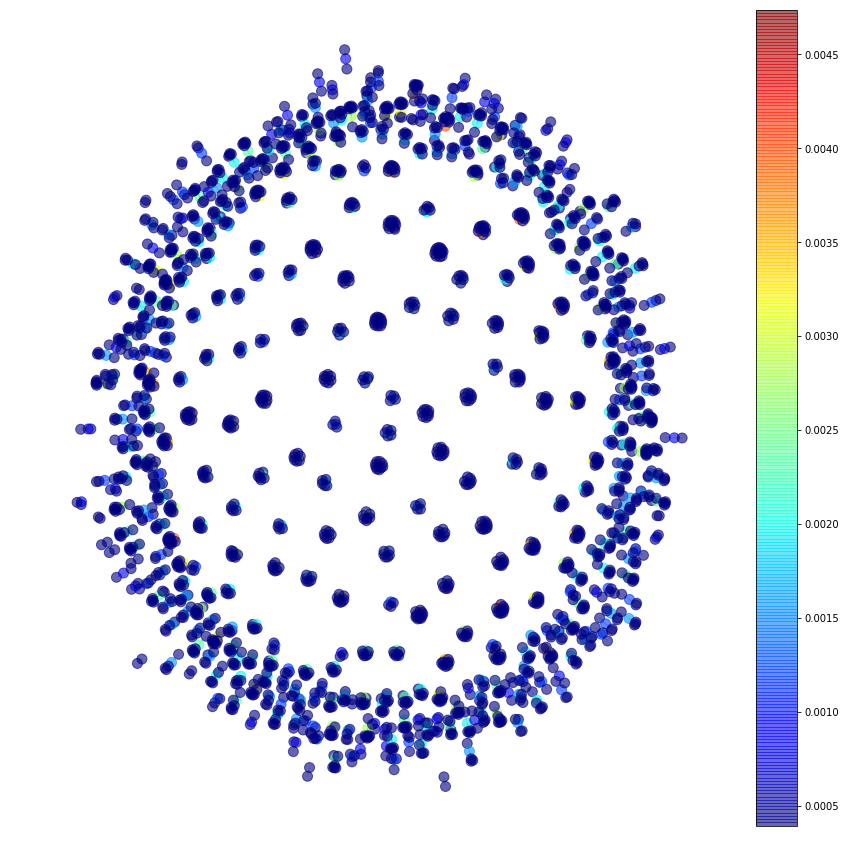

In [89]:
node_color = [cent for cent in nx.degree_centrality(G).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G).values())), 
                            vmax=max(list(nx.degree_centrality(G).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [90]:
length = nx.all_pairs_shortest_path_length(G)

In [91]:
distancias = [x for x in length]

In [92]:
authors_dist_2 = []
for a in distancias:
    principal = a[0]
    coautores = a[1]
    for co,va in coautores.items():
        if va == 2:
            authors_dist_2.append([principal, co])
print(authors_dist_2)

[['aoz95xyz2', 'aoz56xyz11'], ['aoz95xyz2', 'aoz62xyz23'], ['aoz95xyz2', 'aoz93xyz22'], ['aoz31xyz9', 'aoz93xyz7'], ['aoz31xyz9', 'aoz57xyz18'], ['aoz31xyz9', 'aoz15xyz13'], ['aoz31xyz9', 'aoz89xyz24'], ['aoz31xyz9', 'aoz32xyz22'], ['aoz31xyz9', 'aoz48xyz6'], ['aoz97xyz6', 'aoz54xyz10'], ['aoz97xyz6', 'aoz92xyz22'], ['aoz97xyz6', 'aoz106xyz8'], ['aoz97xyz6', 'aoz40xyz13'], ['aoz97xyz6', 'aoz22xyz4'], ['aoz97xyz6', 'aoz85xyz20'], ['aoz97xyz6', 'aoz41xyz9'], ['aoz18xyz8', 'aoz47xyz22'], ['aoz18xyz8', 'aoz23xyz9'], ['aoz18xyz8', 'aoz24xyz21'], ['aoz18xyz8', 'aoz64xyz23'], ['aoz18xyz8', 'aoz85xyz26'], ['aoz18xyz8', 'aoz48xyz23'], ['aoz7xyz18', 'aoz26xyz2'], ['aoz7xyz18', 'aoz58xyz10'], ['aoz7xyz18', 'aoz101xyz3'], ['aoz7xyz18', 'aoz52xyz15'], ['aoz17xyz17', 'aoz98xyz23'], ['aoz17xyz17', 'aoz105xyz2'], ['aoz17xyz17', 'aoz85xyz14'], ['aoz17xyz17', 'aoz96xyz8'], ['aoz17xyz17', 'aoz95xyz21'], ['aoz308xyz212', 'aoz109xyz6'], ['aoz308xyz212', 'aoz63xyz5'], ['aoz308xyz212', 'aoz48xyz9'], ['aoz308

In [93]:
G_futuro = nx.Graph()

In [94]:
for _, b in base.iterrows():
    if b['date_create'] > datetime.datetime.strptime('2007-12-31', "%Y-%m-%d"):
        G_futuro.add_edge(b['author_idauthor'], 
                           b['idauthor_paper'],
                           papers=b['paper_idpaper'])

In [95]:
G_futuro.nodes()

NodeView(('aoz19xyz24', 'auz10ppr18', 'aoz78xyz11', 'auz70ppr21', 'aoz57xyz17', 'auz10ppr15', 'aoz24xyz23', 'auz60ppr18', 'aoz82xyz8', 'auz25ppr15', 'aoz38xyz16', 'auz20ppr12', 'aoz107xyz4', 'auz65ppr10', 'aoz33xyz4', 'auz75ppr13', 'aoz73xyz9', 'auz65ppr8', 'aoz85xyz22', 'auz25ppr8', 'aoz48xyz28', 'auz30ppr19', 'aoz104xyz9', 'auz55ppr14', 'aoz17xyz6', 'auz70ppr7', 'aoz14xyz6', 'auz15ppr2', 'aoz11xyz26', 'auz80ppr11', 'aoz19xyz7', 'auz85ppr6', 'aoz74xyz12', 'auz80ppr3', 'aoz9xyz14', 'auz50ppr14', 'aoz100xyz25', 'auz95ppr20', 'aoz28xyz10', 'auz5ppr13', 'aoz14xyz24', 'auz50ppr6', 'aoz48xyz7', 'auz70ppr3', 'aoz111xyz14', 'auz45ppr11', 'aoz83xyz17', 'auz30ppr17', 'aoz45xyz26', 'auz85ppr19', 'aoz26xyz30', 'auz80ppr19', 'aoz58xyz20', 'auz95ppr6', 'aoz98xyz15', 'auz90ppr15', 'aoz58xyz22', 'auz65ppr3', 'aoz69xyz29', 'auz85ppr10', 'aoz29xyz23', 'auz95ppr3', 'aoz105xyz23', 'auz45ppr17', 'aoz69xyz19', 'auz35ppr2', 'aoz89xyz12', 'auz90ppr13', 'aoz8xyz11', 'auz20ppr9', 'aoz18xyz23', 'auz30ppr12', 'a

In [96]:
pos = nx.spring_layout(G_futuro)

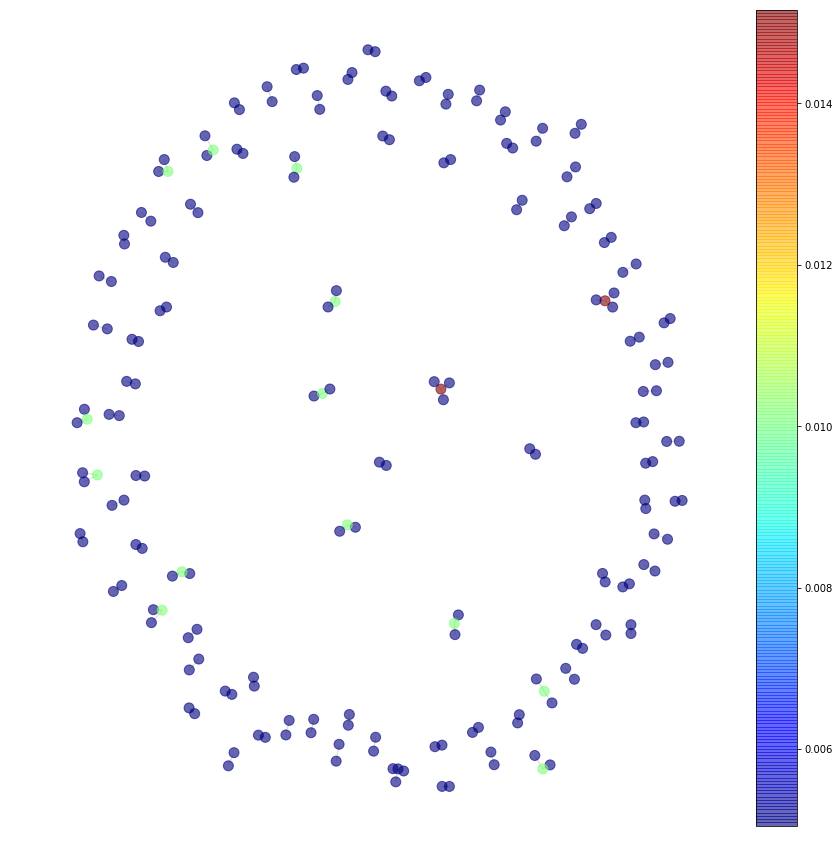

In [97]:
node_color = [cent for cent in nx.degree_centrality(G_futuro).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G_futuro, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G_futuro, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G_futuro).values())), 
                            vmax=max(list(nx.degree_centrality(G_futuro).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [100]:
ligacoes_futuras = pd.DataFrame(authors_dist_2, columns=['Author_1', 'Author_2'])

In [101]:
ligacoes_futuras.head()

,Author_1,Author_2
0,aoz95xyz2,aoz56xyz11
1,aoz95xyz2,aoz62xyz23
2,aoz95xyz2,aoz93xyz22
3,aoz31xyz9,aoz93xyz7
4,aoz31xyz9,aoz57xyz18


In [103]:
ligacoes_futuras['label'] = ligacoes_futuras.apply(
    lambda lig: G_futuro.has_edge(lig['Author_1'], lig['Author_2']), axis=1)

In [107]:
ligacoes_futuras[ligacoes_futuras['label'] == True]

,Author_1,Author_2,label
